In [1]:
import sys
import os

import numpy as np
from process_bigraph import Composite
from process_bigraph.experiments.parameter_scan import RunProcess


sys.path.insert(0, '..')


from biosimulator_processes.processes.amici_process import AmiciUTC
from biosimulator_processes.io import read_report_outputs
from biosimulator_processes.utils import plot_utc_outputs

Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici']
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [2]:
omex_dir = './examples/sbml-core/Elowitz-Nature-2000-Repressilator'
reports_path = os.path.join(omex_dir, 'reports.h5')

In [3]:
amici_process = AmiciUTC(
    config={
        'model': {
            'model_source': omex_dir
        }
    }
)

2024-05-29 13:28:54.601 - amici.sbml_import - INFO - Finished importing SBML                         (3.94E-02s)
2024-05-29 13:28:54.648 - amici.sbml_import - INFO - Finished processing SBML observables            (4.36E-02s)
2024-05-29 13:28:54.652 - amici.sbml_import - INFO - Finished processing SBML event observables      (1.04E-06s)
2024-05-29 13:28:54.673 - amici.de_model - INFO - Finished computing xdot                            (3.30E-03s)
2024-05-29 13:28:54.681 - amici.de_model - INFO - Finished computing x0                              (3.36E-03s)
2024-05-29 13:28:54.699 - amici.de_model - INFO - Finished computing w                               (1.47E-02s)
2024-05-29 13:28:55.392 - amici.de_export - INFO - Finished generating cpp code                      (6.88E-01s)
2024-05-29 13:29:04.422 - amici.de_export - INFO - Finished compiling cpp code                       (9.02E+00s)


In [4]:
# t range parameters set via sedml introspection within archive contents:
amici_process.t[0], amici_process.t[-1], amici_process.duration, amici_process.step_size, amici_process.num_steps

(400.0, 600.0, 600, 1.0, 600)

In [5]:
!cat ./examples/sbml-core/Elowitz-Nature-2000-Repressilator/simulation.sedml

<?xml version="1.0" encoding="UTF-8"?>
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version3" level="1" version="3"
  xmlns:sbml="http://www.sbml.org/sbml/level2/version3">
  <listOfModels>
    <model id="model" language="urn:sedml:language:sbml" source="BIOMD0000000012_url.xml">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id='PX']/@initialAmount" newValue="0"/>
      </listOfChanges>
    </model>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="simulation" initialTime="0" outputStartTime="400" outputEndTime="1000" numberOfPoints="600">
      <algorithm kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task" modelReference="model" simulationReference="simulation"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="data_gen_time" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> var_time </ci>
      </ma

In [6]:
amici_process_results = amici_process.update()

<Axes: >

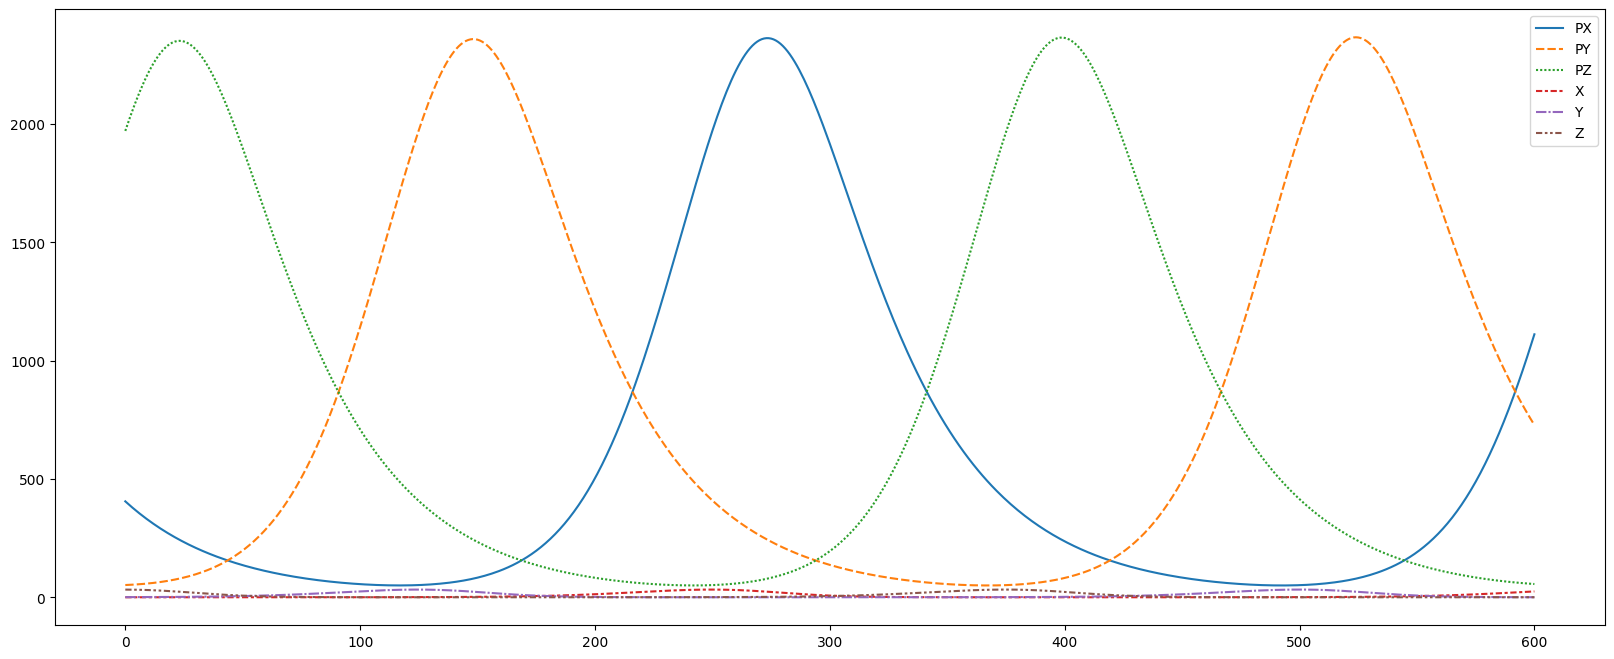

In [7]:
plot_utc_outputs(data=amici_process_results, simulator_name='Amici UTC Process Results for Repressilator')

In [8]:
# Generate comparison matrix from ground truth
from biosimulator_processes.api.compare import generate_comparison

In [12]:
published_results = read_report_outputs(reports_path)

type(published_results)

biosimulator_processes.data_model.service_data_model.BiosimulationsRunOutputData

In [13]:
published_results.data

[BiosimulationsReportOutput(dataset_label='Time', data=array([ 400.,  401.,  402.,  403.,  404.,  405.,  406.,  407.,  408.,
         409.,  410.,  411.,  412.,  413.,  414.,  415.,  416.,  417.,
         418.,  419.,  420.,  421.,  422.,  423.,  424.,  425.,  426.,
         427.,  428.,  429.,  430.,  431.,  432.,  433.,  434.,  435.,
         436.,  437.,  438.,  439.,  440.,  441.,  442.,  443.,  444.,
         445.,  446.,  447.,  448.,  449.,  450.,  451.,  452.,  453.,
         454.,  455.,  456.,  457.,  458.,  459.,  460.,  461.,  462.,
         463.,  464.,  465.,  466.,  467.,  468.,  469.,  470.,  471.,
         472.,  473.,  474.,  475.,  476.,  477.,  478.,  479.,  480.,
         481.,  482.,  483.,  484.,  485.,  486.,  487.,  488.,  489.,
         490.,  491.,  492.,  493.,  494.,  495.,  496.,  497.,  498.,
         499.,  500.,  501.,  502.,  503.,  504.,  505.,  506.,  507.,
         508.,  509.,  510.,  511.,  512.,  513.,  514.,  515.,  516.,
         517.,  518.,  

In [18]:
species_outputs = []
for report_output in published_results.data:
    if not report_output.dataset_label.lower() == 'time':
        species_outputs.append({report_output.dataset_label: report_output.data})

In [20]:
species_outputs

[{'LacI protein': array([ 405.55652983,  379.34614367,  354.84702027,  331.95291683,
          310.56321344,  290.58285165,  271.92221148,  254.49695325,
          238.22782834,  223.0404732 ,  208.86519428,  195.63674871,
          183.29412653,  171.78033735,  161.04220458,  151.03016869,
          141.69810155,  133.00313239,  124.90548688,  117.36833926,
          110.35767863,  103.84218933,   97.79314633,   92.184326  ,
           86.99193258,   82.19454111,   77.77305794,   73.71069919,
           69.99298873,   66.60777672,   63.5452803 ,   60.79814824,
           58.36155136,   56.23330138,   54.41399943,   52.90721951,
           51.71972724,   50.86173903,   50.3472248 ,   50.19425787,
           50.4254164 ,   51.06824025,   52.15574714,   53.72701221,
           55.82781383,   58.51134832,   61.83901449,   65.88126753,
           70.71853851,   76.44221338,   83.15565957,   90.97528359,
          100.03159485,  110.47024147,  122.4529798 ,  136.15850188,
          151.7830